# HW #4: Data Analysis of Building Energy Benchmarking Data


This project focuses on analyzing the City of Calgary’s Building Energy Benchmarking dataset as part of a data science assignment. The objective is to explore, preprocess, and visualize the dataset using a variety of Python tools and techniques. The analysis will involve data cleaning, the application of Regular Expressions (Regex) for text standardization, and the use of Pandas and NumPy for data manipulation and aggregation. Additionally, visualizations will be generated using Matplotlib to identify trends and insights. This process will help to better understand the relationships between building characteristics and energy performance in Calgary.

# Part 1: Data Cleaning and Preprocessing

## 1.1 Load and Inspect the Dataset
__1.1.1__ Load the dataset and display its shape, column names, and data types.

__1.1.2__  Identify and list the number of missing values in each column..

In [2]:
import pandas as pd

# 1.1.1 Load the dataset and display its shape, column names, and data types.
df = pd.read_csv("Building_Energy_Benchmarking.csv")
df.shape             #shape
df.columns           #Columns names
df.info              # data types 


# 1.1.2. Identify and list the number of missing values in each column..
number_missing_values = df.isnull().sum()    #Missing data for each column


########################## Code to display the output in a well-organized format #####################################
# 1.1.1 Load the dataset and display its shape, column names, and data types.
print('\n')
print((' '*10),'1.1.1. LOAD THE DATASET AND DISPLAY ITS SHAPE, COLUMNS, AND DATA TYPES.', '\n')
print(('_'*40), 'SHAPE OF THE df',('_'*40 ))
print('\n','The shape of the df is',df.shape[0],'rows and',df.shape[1],'columns','\n')
print(('_'*38), 'NAME OF EACH COLUMN',('_'*38 ), '\n')
print(df.columns)
print(('_'*36), 'DATA TYPE IN EACH COLUMN',('_'*36 ))
print(df.info(), '\n')
print('\n')

# 1.1.2. Identify and list the number of missing values in each column.
print((' '*13),'1.1.2. IDENTIFY AND LIST THE NUMBER OF MISSING VALUES IN EACH COLUMN')
print('_'*97)
print(number_missing_values)



           1.1.1. LOAD THE DATASET AND DISPLAY ITS SHAPE, COLUMNS, AND DATA TYPES. 

________________________________________ SHAPE OF THE df ________________________________________

 The shape of the df is 494 rows and 31 columns 

______________________________________ NAME OF EACH COLUMN ______________________________________ 

Index(['Property Id', 'Property Name', 'Address 1', 'City', 'Postal Code',
       'Province', 'Primary Property Type - Self Selected',
       'Number of Buildings', 'Year Built',
       'Property GFA - Self-Reported (m²)', 'ENERGY STAR Score',
       'Site Energy Use (GJ)', 'Weather Normalized Site Energy Use (GJ)',
       'Site EUI (GJ/m²)', 'Weather Normalized Site EUI (GJ/m²)',
       'Source Energy Use (GJ)', 'Weather Normalized Source Energy Use (GJ)',
       'Source EUI (GJ/m²)', 'Weather Normalized Source EUI (GJ/m²)',
       'Total GHG Emissions (Metric Tons CO2e)',
       'Total GHG Emissions Intensity (kgCO2e/m²)',
       'Direct GHG Emissions (M

## 1.2 Handling Missing Data
__1.2.1__ Drop columns with more than 40% missing values.


__1.2.2__ For numerical columns, fill missing values with the median of their respective column.

__1.2.3__ For categorical columns, fill missing values with the mode of their respective column.

In [4]:
import pandas as pd 
from sklearn.impute import SimpleImputer

# 1.2.1 Drop columns with more than 40% missing values.
percent_missing = df.isnull().mean() * 100                          #Missing data for each column
drop_columns = df.columns[(percent_missing/100) > 0.4].tolist()     #Identify columns or rows with more than 40% missing values
dfc = df.drop(drop_columns, axis=1)                                 #Drop columns in a new DF called dfc 



# 1.2.2 For numerical columns, fill missing values with the median of their respective column.
num_cols = dfc.select_dtypes(include=['float64', 'int64']).columns  #Identify numerical columns
median_imputer = SimpleImputer(strategy = 'median')                 #Establish with what to replace missing values
dfc[num_cols] = median_imputer.fit_transform(dfc[num_cols])         #Replace missing values with median
print(num_cols.isnull().mean() * 100, '\n')



# 1.2.3 For categorical columns, fill missing values with the mode of their respective column.
categor_cols = dfc.columns.difference(num_cols)                                  #Identify categorical columns != numerical columns
dfc[categor_cols] = dfc[categor_cols].apply(lambda x: x.fillna(x.mode()[0]))     #Replace with mode in the missing values 



########################## Code to display the output in a well-organized format #####################################
# 1.2.1 Drop columns with more than 40% missing values.
print((' '*27),'1.1.2. DROP COLUMNS WITH MORE THAN 40% MISSING VALUES', '\n')
print(('_'*26), 'PERCENTAGE OF MISSING DATA FOR EACH COLUMN',('_'*26))
print(percent_missing, '\n')
print(('_'*25), 'COLUMNS DROPED WITH MORE THAN 40% MISSING VALUES',('_'*25))
print(drop_columns)
print('_'*100, '\n')

# 1.2.2 For numerical columns, fill missing values with the median of their respective column.
print('\n',(' '*6), '1.2.2 FOR NUMERICAL COLUMNS, FILL MISSING VALUES WITH THE MEDIAN OF THEIR RESPECTIVE COLUMN', '\n')
print(('_'*15), 'PERCENTAGE OF MISSING DATA IN EACH NUMERICAL COLUMN AFTER IMPUTATION',('_'*15))
print(dfc[num_cols].isnull().mean() * 100)
print('_'*100, '\n')

# 1.2.3 For categorical columns, fill missing values with the mode of their respective column.
print((' '*6), ' 1.2.3 FOR CATEGORICAL COLUMNS, FILL MISSING VALUES WITH THE MODE OF THEIR RESPECTIVE COLUMN', '\n')
print(('_'*14), 'PERCENTAGE OF MISSING DATA IN EACH CATEGORICAL COLUMN AFTER IMPUTATION',('_'*14))
print(dfc[categor_cols].isnull().mean() * 100)
print('_'*100, '\n')

0.0 

                            1.1.2. DROP COLUMNS WITH MORE THAN 40% MISSING VALUES 

__________________________ PERCENTAGE OF MISSING DATA FOR EACH COLUMN __________________________
Property Id                                                               0.000000
Property Name                                                             0.000000
Address 1                                                                 0.000000
City                                                                      0.000000
Postal Code                                                               0.000000
Province                                                                  0.000000
Primary Property Type - Self Selected                                     0.000000
Number of Buildings                                                       0.000000
Year Built                                                                0.000000
Property GFA - Self-Reported (m²)                                 

## 1.3 Extracting and Cleaning Data Using Regex
• **Use Regex only to:**

__1.3.1__ Extract numeric values from text-based numeric columns (e.g., Property GFA,
Energy Use, Emissions).

__1.3.2__ Standardize Postal Codes to follow the Canadian format (A1A 1A1).

__1.3.3__ Clean and extract meaningful text from Property Names and Addresses.

__1.3.4__ Ensure extracted values are properly converted to numerical types for analysis.

In [6]:
import re
import pandas as pd

#1.3.1 Extract numeric values from text-based numeric columns (e.g., Property GFA, Energy Use, Emissions).
def str_num(df):                                                                      #Function to find object columns with numerical value
    numeric_columns = []                                                              #List of the column names 'object with nuemerical value'
    for col in df.select_dtypes(include=['object']).columns:                          #Inlude only 'object' columns
        if df[col].astype(str).str.match(r'^-?\d+(\.\d+)?$', na=False).any():         #Identify if they actually contain numeric values   
            numeric_columns.append(col)                                               
    return numeric_columns
names = str_num(dfc)    
for col in names:                                                                    #Extract the numerical values from 'object' columns
    dfc[col] = dfc[col].apply(lambda x: float(re.findall(r'-?\d+\.?\d*', str(x))[0]) if re.findall(r'-?\d+\.?\d*', str(x)) else None)



# 1.3.2 Standardize Postal Codes to follow the Canadian format (A1A 1A1).
def Canadian_format(postal):                                                                   #Function to orginice the postal code with the Canadian format
    match = re.match(r'([a-zA-Z]\d[a-zA-Z])\s?(\d[a-zA-Z]\d)', str(postal).upper().strip())    #Not only the format as well the upper case  
    return f"{match.group(1)} {match.group(2)}" if match else None                       
dfc["Postal Code"] = dfc["Postal Code"].apply(Canadian_format)                                  #Apply the function to the column 'Postal Code'



# 1.3.3 Clean and extract meaningful text from Property Names and Addresses.
#Property Name: Accepts letters and numbers. Also characters like - and #. Does not accept double spacing
dfc['Property Name'] = dfc['Property Name'].apply(lambda x: re.sub(r'/^(?!.*  )[a-zA-Z0-9#-]+( [a-zA-Z0-9#-]+)?$/', '', x).strip())

#Addres 1: Function so that words with more than 3 letters (name) are not all capitalized but only the first letter of the word.
def capitalize_large_words(text):
    return re.sub(r'\b[A-Z]{3,}\b', lambda m: m.group(0).capitalize(), text)
dfc['Address 1']= dfc['Address 1'].apply(capitalize_large_words)


# 1.3.4 Ensure extracted values are properly converted to numerical types for analysis.
#dfc.info()
dfc['Year Built'] = dfc['Year Built'].astype(int)
dfc['Year Ending'] = dfc['Year Ending'].astype(int)


########################## Code to display the output in a well-organized format #####################################
#1.3.1 Extract numeric values from text-based numeric columns (e.g., Property GFA, Energy Use, Emissions)

# Detectar columnas con números almacenados como texto
print((' '*3),'1.3.1 EXTRACT NUMERIC VALUES FROM TEXT-BASED NUMERIC COLUMNS (E.G., PROPERTY GFA, ENERGY USE, EMISSIONS)', '\n')
print(('_'*26), 'list of *object column* names with numeric values',('_'*26))
print(names, '\n')
print('_'*100, '\n')

# 1.3.4 Ensure extracted values are properly converted to numerical types for analysis.

print((' '*6), '1.3.4 ENSURE EXTRACTED VALUES ARE PROPERLY CONVERTED TO NUMERICAL TYPES FOR ANALYSIS', '\n')
print(dfc.info())
print('_'*100, '\n')


# 1.3.2 Standardize Postal Codes to follow the Canadian format (A1A 1A1).
print('\n',(' '*6), '1.3.2 STANDARDIZE POSTAL CODES TO FOLLOW THE CANADIAN FORMAT (A1A 1A1).', '\n')
print(dfc["Postal Code"].head())
print('_'*100, '\n')

# 1.3.3 Clean and extract meaningful text from Property Names and Addresses.
print((' '*6), '1.3.3 CLEAN AND EXTRACT MEANINGFUL TEXT FROM PROPERTY NAMES AND ADDRESSES.', '\n')
dfc[['Property Name', 'Address 1']].head(20)

    1.3.1 EXTRACT NUMERIC VALUES FROM TEXT-BASED NUMERIC COLUMNS (E.G., PROPERTY GFA, ENERGY USE, EMISSIONS) 

__________________________ list of *object column* names with numeric values __________________________
['Property GFA - Self-Reported (m²)', 'Site Energy Use (GJ)', 'Weather Normalized Site Energy Use (GJ)', 'Source Energy Use (GJ)', 'Weather Normalized Source Energy Use (GJ)', 'Total GHG Emissions (Metric Tons CO2e)', 'Direct GHG Emissions (Metric Tons CO2e)', 'Electricity Use - Grid Purchase (kWh)', 'Natural Gas Use (GJ)'] 

____________________________________________________________________________________________________ 

       1.3.4 ENSURE EXTRACTED VALUES ARE PROPERLY CONVERTED TO NUMERICAL TYPES FOR ANALYSIS 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494 entries, 0 to 493
Data columns (total 26 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Prop

,Property Name,Address 1
0,Acadia Aquatic & Fitness Centre,9009 Fairmount Dr SE
1,Ad Valorem,2924 11 ST NE
2,Alberta Trade Centre,315 10 AV SE
3,Andrew Davison,133 6 AV SE
4,Animal Services Centre,2201 Portland ST SE
5,Apparatus Repair Shop and Spare Apparatus Shop,1725 18 AV NE
6,Beltline Aquatic & Fitness Centre,221 12 Av SW
7,Bob Bohan Aquatic and Fitness Centre,4812 14 Av SE
8,Bowmont Civic Building,5000 Bowness Civic Building
9,Calgary Public Building,205 8 AV SE


# Part 2: Exploratory Data Analysis (EDA) and Aggregations
## 2.1 Statistical Summary
__2.1.1__ Generate summary statistics for numerical features using extracted data.

__2.1.2__  Identify and explain key observations (e.g., outliers, mean vs. median differences).

In [8]:
import re
import pandas as pd

# 2.1.1 Generate summary statistics for numerical features using extracted data.
num_cols = dfc.select_dtypes(include=['float64', 'int64']).columns                             #Identify numerical columns
sum_stat = dfc[num_cols[4:-1]].describe()                                                      #Exclude columns with irrelevant numbers (e.g. Property ID)

# 2.1.2 Identify and explain key observations (e.g., outliers, mean vs. median differences)
# Calculate mean vs median differences
sum_stat.loc['mean vs median differences'] = sum_stat.loc['mean'] - dfc[num_cols].median()             #Add a new row with mean vs median
sum_stat.loc['mean_vs_median_labels'] = sum_stat.loc['mean vs median differences'].apply(lambda diff:  #Add new row describing the difference
                                                             'Right-skewed' if diff > 1 
                                                             else 'Left-skewed' if diff < 0 
                                                             else 'Almost Symmetric' if 0 < diff <= 1 
                                                             else 'Symmetric'
                                             )

#Code to extract outliers
IQR = sum_stat.loc['75%'] - sum_stat.loc['25%']                                                                                                
sum_stat.loc['Lower outlier'] = sum_stat.loc['25%'] - 1.5 *IQR       #lower outlier
sum_stat.loc['Upper outlier'] = sum_stat.loc['75%'] + 1.5 *IQR       #Upper outliers  


# I converted all values to integers as the values are very large.
sum_stat = sum_stat.apply(lambda col: col.map(lambda x: int(x) if isinstance(x, (int, float)) else x))  
sum_stat

,Weather Normalized Site Energy Use (GJ),Site EUI (GJ/m²),Weather Normalized Site EUI (GJ/m²),Source Energy Use (GJ),Weather Normalized Source Energy Use (GJ),Source EUI (GJ/m²),Weather Normalized Source EUI (GJ/m²),Total GHG Emissions (Metric Tons CO2e),Total GHG Emissions Intensity (kgCO2e/m²),Direct GHG Emissions (Metric Tons CO2e),Direct GHG Emissions Intensity (kgCO2e/m²),Electricity Use - Grid Purchase (kWh)
count,494,494,494,494,494,494,494,494,494,494,494,494
mean,3699,1,1,4556,4160,2,2,442,158,213,63,253922
std,15776,1,1,18232,17313,1,1,1078,109,713,56,834877
min,1,0,0,1,1,0,0,1,10,0,0,1
25%,3,0,1,4,4,1,1,77,93,41,33,113
50%,81,1,1,36,36,1,1,173,117,74,43,462
75%,1677,2,2,2079,1963,2,2,446,186,223,74,149170
max,242611,8,8,261481,260399,10,10,13067,666,12243,386,9618602
mean vs median differences,3618,0,0,4520,4124,0,0,269,41,139,19,253460
mean_vs_median_labels,Right-skewed,Almost Symmetric,Almost Symmetric,Right-skewed,Right-skewed,Almost Symmetric,Almost Symmetric,Right-skewed,Right-skewed,Right-skewed,Right-skewed,Right-skewed


In [9]:
# 2.1.2 Identify and explain key observations (e.g., outliers, mean vs. median differences)
print(sum_stat.loc['mean vs median differences'].idxmin( ))
print(sum_stat.loc['mean vs median differences'].min( ))
print(sum_stat.loc['mean vs median differences'].idxmax( ))
print(sum_stat.loc['mean vs median differences'].max( ))
print(sum_stat.loc['std'].idxmax( ))
print(sum_stat.loc['std'].max( ))


Site EUI (GJ/m²)
0
Electricity Use - Grid Purchase (kWh)
253460
Electricity Use - Grid Purchase (kWh)
834877


on.

## 2.2 Aggregations
__2.2.1__ Compute the average Energy Use Intensity (EUI) by Property Type.

__2.2.2__  Compute the total Greenhouse Gas (GHG) emissions by year.

__2.2.3__ Identify the top 5 properties with the highest total energy consumption.

In [51]:
# 2.2.1 Compute the average Energy Use Intensity (EUI) by Property Type.
EUI_PT = dfc.groupby('Primary Property Type - Self Selected', as_index=False).agg(
    Avrg_Site_EUI=('Site EUI (GJ/m²)', 'mean'), 
    Avrg_Weather_Normalized_Site_EUI=('Weather Normalized Site EUI (GJ/m²)', 'mean'),
    Avrg_Source_EUI=('Source EUI (GJ/m²)', 'mean'),
    Avrg_Weather_Normalized_Source_EUI=('Weather Normalized Source EUI (GJ/m²)', 'mean')  # Renamed to avoid repetition
)

EUI_PT


,Primary Property Type - Self Selected,Avrg_Site_EUI,Avrg_Weather_Normalized_Site_EUI,Avrg_Source_EUI,Avrg_Weather_Normalized_Source_EUI
0,Distribution Center,3.286000,3.284000,3.496000,3.492000
1,Fire Station,1.208827,1.223799,1.572849,1.587263
2,Fitness Center/Health Club/Gym,4.385000,4.472250,5.306750,5.398000
3,Heated Swimming Pool,4.805333,4.924000,5.895333,6.020000
4,Ice/Curling Rink,2.182200,2.220800,2.862400,2.903400
5,Indoor Arena,1.106000,1.148000,1.358000,1.404000
6,Mixed Use Property,0.458000,0.470000,0.522000,0.534000
7,Museum,1.584000,1.652000,2.050000,2.124000
8,Non-Refrigerated Warehouse,0.768000,0.781333,1.039333,1.052667
9,Office,1.519636,1.561000,2.072545,2.115364


In [53]:
dfc.columns

Index(['Property Id', 'Property Name', 'Address 1', 'City', 'Postal Code',
       'Province', 'Primary Property Type - Self Selected',
       'Number of Buildings', 'Year Built',
       'Property GFA - Self-Reported (m²)', 'Site Energy Use (GJ)',
       'Weather Normalized Site Energy Use (GJ)', 'Site EUI (GJ/m²)',
       'Weather Normalized Site EUI (GJ/m²)', 'Source Energy Use (GJ)',
       'Weather Normalized Source Energy Use (GJ)', 'Source EUI (GJ/m²)',
       'Weather Normalized Source EUI (GJ/m²)',
       'Total GHG Emissions (Metric Tons CO2e)',
       'Total GHG Emissions Intensity (kgCO2e/m²)',
       'Direct GHG Emissions (Metric Tons CO2e)',
       'Direct GHG Emissions Intensity (kgCO2e/m²)',
       'Electricity Use - Grid Purchase (kWh)', 'Natural Gas Use (GJ)',
       'Year Ending', 'Unique ID'],
      dtype='object')

In [13]:
import pandas as pd

# 2.2.2 Compute the total Greenhouse Gas (GHG) emissions by year.
def GHG_year(row):
    years = list(range(row['Year Built'], row['Year Ending'] + 1))                   #Create a list of years from 'Year Built' to 'Year Ending'
    T_years = len(years)                                                             #Count the number of years
    annual_emission = row['Total GHG Emissions (Metric Tons CO2e)'] / T_years        #Distribute emissions equally per year
    data = {str(year): annual_emission for year in years}                            #Create a dictionary with years as keys and annual emissions as values
    return pd.Series(data)                                                           #Convert dictionary to a Pandas Series
GHG_yearly = dfc.apply(GHG_year, axis=1).fillna(0)                                   #Apply the function to each row and fill missing values with 0

                                                      
IC = dfc[['Property Id', 'Property Name', 'Address 1', 'Postal Code',                #Select key columns for better interpretation of results
                         'Primary Property Type - Self Selected', 'Total GHG Emissions (Metric Tons CO2e)']]
GHG_yearly = pd.concat([IC, GHG_yearly], axis=1)                                     #Add selected columns at the beginning
GHG_yearly.head() 



,Property Id,Property Name,Address 1,Postal Code,Primary Property Type - Self Selected,Total GHG Emissions (Metric Tons CO2e),1896,1897,1898,1899,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,10176804.0,Acadia Aquatic & Fitness Centre,9009 Fairmount Dr SE,T2H 0Z4,Heated Swimming Pool,509.0,0.0,0.0,0.0,0.0,...,36.357143,36.357143,36.357143,36.357143,36.357143,36.357143,36.357143,36.357143,36.357143,36.357143
1,6169481.0,Ad Valorem,2924 11 ST NE,T2E 7L7,Office,920.0,0.0,0.0,0.0,0.0,...,21.395349,21.395349,21.395349,21.395349,21.395349,21.395349,21.395349,21.395349,21.395349,21.395349
2,6305956.0,Alberta Trade Centre,315 10 AV SE,T2G 0W2,Office,499.0,0.0,0.0,0.0,0.0,...,9.980000,9.980000,9.980000,9.980000,9.980000,9.980000,9.980000,9.980000,9.980000,9.980000
3,8854296.0,Andrew Davison,133 6 AV SE,T2G 0G2,Office,1293.0,0.0,0.0,0.0,0.0,...,28.733333,28.733333,28.733333,28.733333,28.733333,28.733333,28.733333,28.733333,28.733333,28.733333
4,21988603.0,Animal Services Centre,2201 Portland ST SE,T2G 4M7,Office,568.0,0.0,0.0,0.0,0.0,...,23.666667,23.666667,23.666667,23.666667,23.666667,23.666667,23.666667,23.666667,23.666667,23.666667


In [14]:
# 2.2.3 Identify the top 5 properties with the highest total energy consumption.
Total_top_5 = dfc[['Property Name', 'Electricity Use - Grid Purchase (kWh)']].sort_values('Electricity Use - Grid Purchase (kWh)', ascending=False).head(5)
Total_energy_general = dfc[['Property Name', 'Natural Gas Use (GJ)']].sort_values('Natural Gas Use (GJ)', ascending=False).head(5)



########################## Code to display the output in a well-organized format #####################################
print((' '*7),'2.2.3 IDENTIFY THE TOP 5 PROPERTIES WITH THE HIGHEST TOTAL ENERGY CONSUMPTION', '\n')
print(('_'*13), 'Top 5 Properties with Highest Electricity Consumption (Grid Purchase)',('_'*14))
print(Total_top_5, '\n')
print('_'*100, '\n')
print(('_'*12), 'Top 5 Properties with Highest General Energy Consumption (Natural Gas Use)',('_'*12))
print(Total_energy_general, '\n')
print('_'*100, '\n')




        2.2.3 IDENTIFY THE TOP 5 PROPERTIES WITH THE HIGHEST TOTAL ENERGY CONSUMPTION 

_____________ Top 5 Properties with Highest Electricity Consumption (Grid Purchase) ______________
                   Property Name  Electricity Use - Grid Purchase (kWh)
73             Municipal Complex                              9618602.0
307            Municipal Complex                              8926946.0
447  Emergency Operations Centre                              4504387.0
290     Southland Leisure Centre                              4415788.0
16   Emergency Operations Centre                              4356404.0 

____________________________________________________________________________________________________ 

____________ Top 5 Properties with Highest General Energy Consumption (Natural Gas Use) ____________
                     Property Name  Natural Gas Use (GJ)
293        Stoney Transit Facility              238415.0
457        Stoney Transit Facility              154863.0
296 

## 2.3 Detecting Outliers Using Regex and IQR
• Use Regex only to:

__2.3.1__ Identify values that do not conform to expected numeric formats.

__2.3.2__ Remove or correct incorrectly formatted numeric values.

__2.3.3__ Apply the Interquartile Range (IQR) method to detect outliers in Total GHG Emissions
(Metric Tons CO2e).


__2.3.4__ Replace outliers with the median value for that property type.

In [26]:
import re

# 2.3.1 Identify values that do not conform to expected numeric formats.
def identify_values(df):                                                            #Function to identify columns with numeric values that are incorrectly formatted
    float_columns = df.select_dtypes(include=['float64']).columns                   #Identify all Float columns
    columns_int = []                                                                #List to store columns to be converted to int
    for column in float_columns:                                                    #Identify with regex if # Check if all values are float with .0
        not_float = df[column].apply(lambda x: bool(re.match(r'.*\.0$', str(x)))).all()
        if not_float:
            columns_int.append(column)
    return columns_int
correct_type = identify_values(dfc)                                                  #Apply the function to the dfc



# 2.3.2 Remove or correct incorrectly formatted numeric values.
dfc[correct_type] = dfc[correct_type].astype(int)                                    #Convert the identified columns to int



########################## Code to display the output in a well-organized format #####################################
# 2.3.1 Identify values that do not conform to expected numeric formats.
print((' '*8), '2.3.1 IDENTIFY VALUES THAT DO NOT CONFORM TO EXPECTED NUMERIC FORMATS.', '\n')
print(f'List of the columns with incorrect format = {correct_type}')
print('_'*100, '\n')


# 2.3.2 Remove or correct incorrectly formatted numeric values.
print('\n',(' '*7), '2.3.2 REMOVE OR CORRECT INCORRECTLY FORMATTED NUMERIC VALUES', '\n')
dfc.head(5)

         2.3.1 IDENTIFY VALUES THAT DO NOT CONFORM TO EXPECTED NUMERIC FORMATS. 

List of the columns with incorrect format = ['Property Id', 'Number of Buildings', 'Electricity Use - Grid Purchase (kWh)']
____________________________________________________________________________________________________ 


         2.3.2 REMOVE OR CORRECT INCORRECTLY FORMATTED NUMERIC VALUES 



,Property Id,Property Name,Address 1,City,Postal Code,Province,Primary Property Type - Self Selected,Number of Buildings,Year Built,Property GFA - Self-Reported (m²),...,Source EUI (GJ/m²),Weather Normalized Source EUI (GJ/m²),Total GHG Emissions (Metric Tons CO2e),Total GHG Emissions Intensity (kgCO2e/m²),Direct GHG Emissions (Metric Tons CO2e),Direct GHG Emissions Intensity (kgCO2e/m²),Electricity Use - Grid Purchase (kWh),Natural Gas Use (GJ),Year Ending,Unique ID
0,10176804,Acadia Aquatic & Fitness Centre,9009 Fairmount Dr SE,Calgary,T2H 0Z4,Alberta,Heated Swimming Pool,1,2010,1838.0,...,4.47,4.91,509.0,276.7,280.0,152.4,368616,5453.0,2023,2023-10176804
1,6169481,Ad Valorem,2924 11 ST NE,Calgary,T2E 7L7,Alberta,Office,1,1981,7770.0,...,1.57,1.64,920.0,118.4,243.0,31.2,1091854,4725.0,2023,2023-6169481
2,6305956,Alberta Trade Centre,315 10 AV SE,Calgary,T2G 0W2,Alberta,Office,1,1974,6681.0,...,0.94,1.00,499.0,74.6,0.0,0.0,508589,3.0,2023,2023-6305956
3,8854296,Andrew Davison,133 6 AV SE,Calgary,T2G 0G2,Alberta,Office,1,1979,17468.0,...,0.97,1.04,1293.0,74.0,26.0,1.5,1152308,506.0,2023,2023-8854296
4,21988603,Animal Services Centre,2201 Portland ST SE,Calgary,T2G 4M7,Alberta,Office,1,2000,2143.0,...,4.00,4.27,568.0,265.2,253.0,118.1,508594,4926.0,2023,2023-21988603


In [28]:
# 2.3.3 Apply the Interquartile Range (IQR) method to detect outliers in Total GHG Emissions (Metric Tons CO2e).
GHG = 'Total GHG Emissions (Metric Tons CO2e)'                           #Name of the column 
Q1 = dfc[GHG].quantile(0.25)                                             #Code for find the lower and upper limit
Q3 = dfc[GHG].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

Cdf = dfc.copy()                                                         #Created a copy of Df so it will identify outliers only one time
outlier = 'Outlier Total GHG Emissions (Metric Tons CO2e)'               #The name of the new column. The name was really long to use it in the code
Cdf[outlier] = (dfc[GHG] < lower_limit) | (dfc[GHG] > upper_limit)       #Identify Outliers with the old df so this value won't change



# 2.3.4 Replace outliers with the median value for that property type.
property_type = 'Primary Property Type - Self Selected'
medians = dfc.groupby(property_type)[GHG].median()                                 #Calculate the median by property type with the old df
Cdf.loc[Cdf[outlier], GHG] = Cdf.loc[Cdf[outlier], property_type].map(medians)     #Replace outliers with the median value



########################## Code to display the output in a well-organized format #####################################
# 2.3.3 Apply the Interquartile Range (IQR) method to detect outliers in Total GHG Emissions (Metric Tons CO2e).
print((' '*7), '2.3.3 APPLY THE INTERQUARTILE RANGE (IQR) METHOD TO DETECT OUTLIERS IN TOTAL GHG EMISSIONS (METRIC TONS CO2E)', '\n')
print(f'The lower outlier is {lower_limit}')
print('which is unrealistic as it is negative. This occurs because the IQR method can result in negative values, but in the context of emissions, the real lower limit is 0.') 
print(f'The upper limit is {upper_limit}.')
print('_'*100, '\n')


# 2.3.4 Replace outliers with the median value for that property type.
print('\n',(' '*7), '2.3.4 REPLACE OUTLIERS WITH THE MEDIAN VALUE FOR THAT PROPERTY TYPE.', '\n')
Cdf[['Property Id', property_type, GHG]].head()

        2.3.3 APPLY THE INTERQUARTILE RANGE (IQR) METHOD TO DETECT OUTLIERS IN TOTAL GHG EMISSIONS (METRIC TONS CO2E) 

The lower outlier is -476.48750000000007
which is unrealistic as it is negative. This occurs because the IQR method can result in negative values, but in the context of emissions, the real lower limit is 0.
The upper limit is 999.8125000000001.
____________________________________________________________________________________________________ 


         2.3.4 REPLACE OUTLIERS WITH THE MEDIAN VALUE FOR THAT PROPERTY TYPE. 



,Property Id,Primary Property Type - Self Selected,Total GHG Emissions (Metric Tons CO2e)
0,10176804,Heated Swimming Pool,509.0
1,6169481,Office,920.0
2,6305956,Office,499.0
3,8854296,Office,180.6
4,21988603,Office,568.0


# Part 3: Data Visualization
## 3.1 Time-Series Visualization

__3.1.1__ Plot the yearly trend of average Site Energy Use Intensity (EUI).

__3.2.1__ Highlight any significant increases or decreases in energy usage.


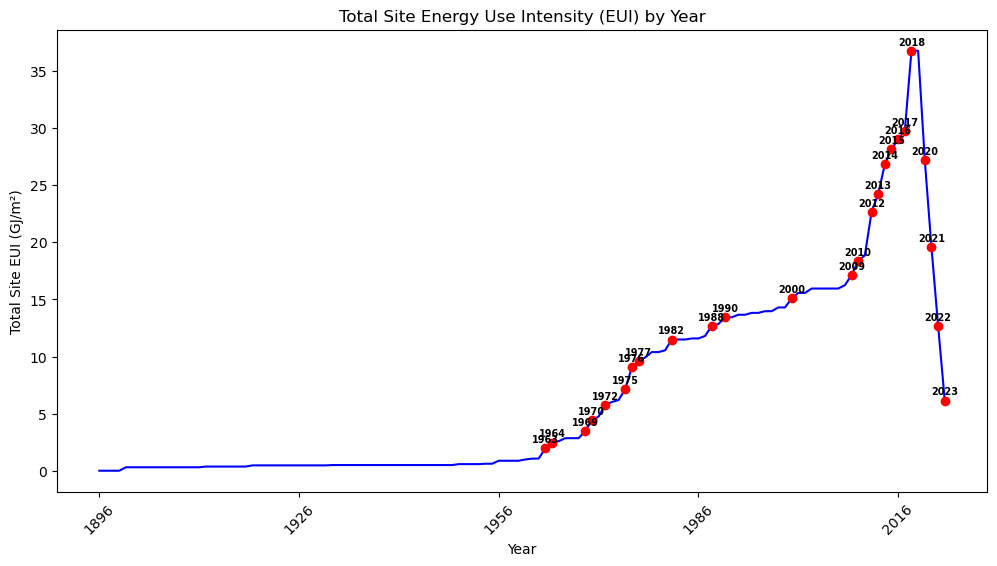

In [141]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 3.1.1 Plot the yearly trend of average Site Energy Use Intensity (EUI).
def EUI_year(row):
    years = list(range(row['Year Built'], row['Year Ending'] + 1))                   #Create a list of years from 'Year Built' to 'Year Ending'
    T_years = len(years)                                                             #Count the number of years
    annual_emission = row['Site EUI (GJ/m²)'] / T_years                              #Distribute Energy Use Intensity equally per year
    data = {str(year): annual_emission for year in years}                            #Create a dictionary with years as keys and annual Energy Use Intensity
    return pd.Series(data)                                                           #Convert dictionary to a Pandas Series
EUI_yearly = dfc.apply(EUI_year, axis=1).fillna(0)                                   #Apply the function to each row and fill missing values with 0

   
EUI_yearly.head() 
Plot_EUI = EUI_yearly.sum()
Plot_EUI

#Code for plot
threshold = 0.5  
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(Plot_EUI.index, Plot_EUI.values, color='blue', label='Energy Use Intensity')

# 3.2.1 Highlight any significant increases or decreases in energy usage.
for i in range(1, len(Plot_EUI)):
    if abs(Plot_EUI.iloc[i] - Plot_EUI.iloc[i-1]) > threshold:  
        ax.plot(Plot_EUI.index[i], Plot_EUI.iloc[i], marker='o', color='red')  
        ax.text(Plot_EUI.index[i], Plot_EUI.iloc[i] + 0.5, str(Plot_EUI.index[i]), 
                color='black', fontsize=7, ha='center', fontweight='bold') 

plt.xlabel("Year")
plt.ylabel("Total Site EUI (GJ/m²)")
plt.title("Total Site Energy Use Intensity (EUI) by Year")

# Setting the x-ticks to appear every 30 years
tick_positions = range(0, len(Plot_EUI), 30)  
tick_labels = [Plot_EUI.index[i] for i in tick_positions]  
ax.set_xticks(tick_positions)  
ax.set_xticklabels(tick_labels, rotation=45)
plt.show()

## 3.2 Comparative Bar Charts

__3.2.1__ Create a bar chart showing the top 10 buildings with the highest GHG emissions.

__3.2.2__ Annotate the bar chart with emission values.

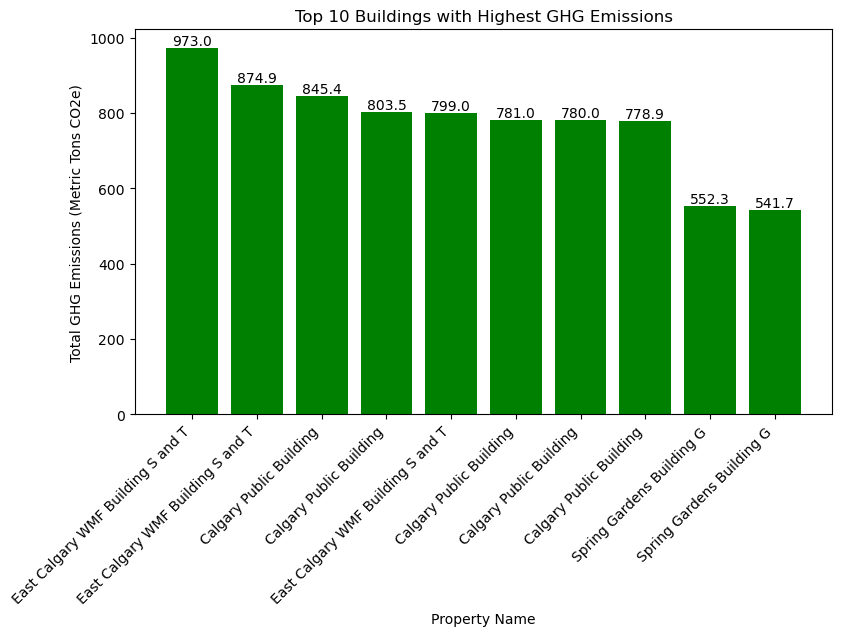

In [280]:
import matplotlib.pyplot as plt

# 3.2.1 Create a bar chart showing the top 10 buildings with the highest GHG emissions.
building = Cdf[Cdf['Property Name'].str.contains('Building', case=False)]
building_top10 = building[['Property Name', 'Total GHG Emissions (Metric Tons CO2e)']].sort_values(
    by='Total GHG Emissions (Metric Tons CO2e)', ascending=False).head(10)
building_top10 = building_top10.reset_index(drop=True)


# Char bar code 
plt.figure(figsize=(9, 5))
bars = plt.bar(building_top10.index, building_top10['Total GHG Emissions (Metric Tons CO2e)'], color='green')
plt.xticks(building_top10.index, building_top10['Property Name'], rotation=45, ha='right')


# 3.2.2 Annotate the bar chart with emission values.
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}', ha='center', va='bottom')

plt.xlabel("Property Name")
plt.ylabel("Total GHG Emissions (Metric Tons CO2e)")
plt.title("Top 10 Buildings with Highest GHG Emissions")
plt.show()

## 3.3 Heatmap Visualization
• Create a heatmap of energy usage intensity (Site EUI (GJ/m²)) across different property
types.

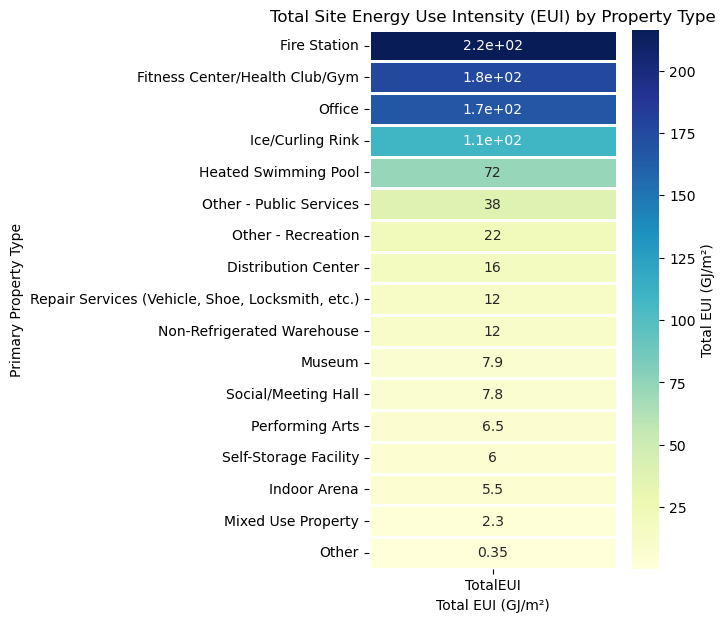

In [231]:
import seaborn as sns
import matplotlib.pyplot as plt

# 3.3 Create a heatmap of energy usage intensity (Site EUI (GJ/m²)) across different property types.
EUI = Cdf.groupby('Primary Property Type - Self Selected').agg(
    TotalEUI=('Site EUI (GJ/m²)', 'sum')
).reset_index()
EUI = EUI.sort_values(by='TotalEUI', ascending=False)
EUI_pivot = EUI.set_index('Primary Property Type - Self Selected')

#Code Heatmap
plt.figure(figsize=(4, 7))  
sns.heatmap(EUI_pivot, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Total EUI (GJ/m²)'}, linewidths=0.9)
plt.title('Total Site Energy Use Intensity (EUI) by Property Type')
plt.xlabel('Total EUI (GJ/m²)')
plt.ylabel('Primary Property Type')
plt.show()


# Part 4: Further Analysis

## 4.1 Correlation Analysis

__4.1.1__ Compute and visualize the correlation matrix between energy consumption, emissions, and building size.

__4.1.2__ Identify any strong correlations and explain their implications.

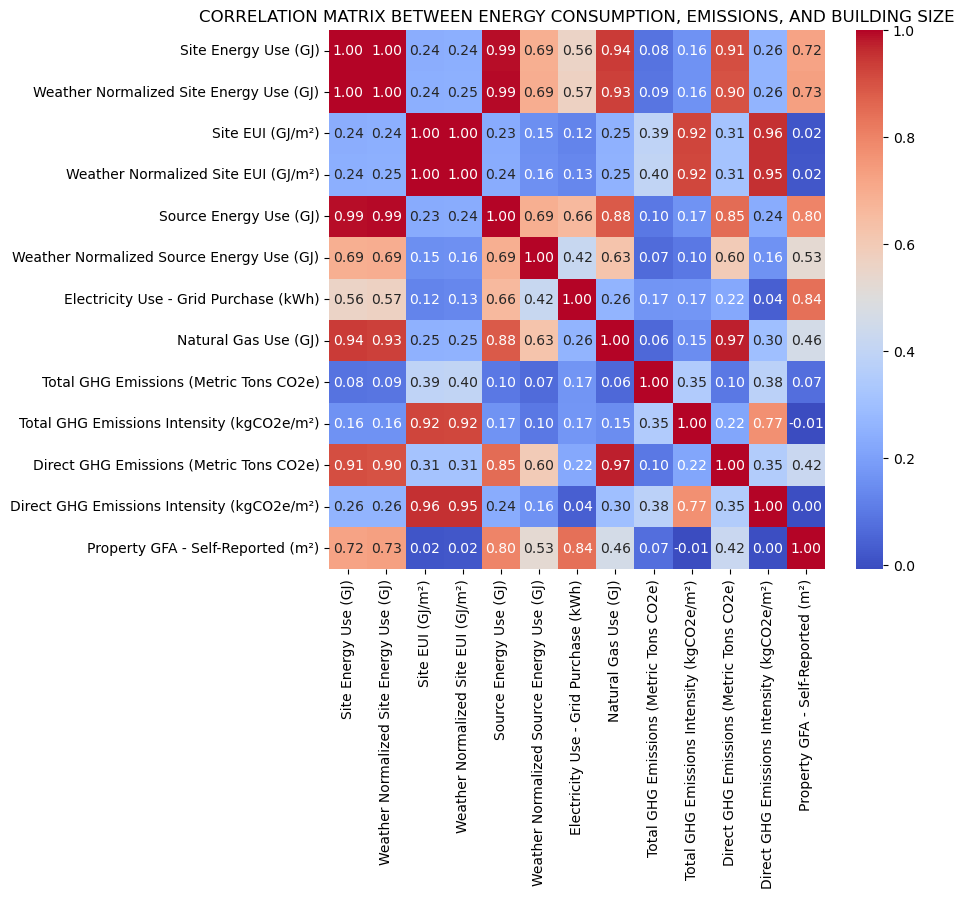

In [272]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# 4.1.1 Compute and visualize the correlation matrix between energy consumption, emissions, and building size
columns_for_correlation = [
    'Site Energy Use (GJ)', 
    'Weather Normalized Site Energy Use (GJ)', 
    'Site EUI (GJ/m²)', 
    'Weather Normalized Site EUI (GJ/m²)', 
    'Source Energy Use (GJ)', 
    'Weather Normalized Source Energy Use (GJ)', 
    'Electricity Use - Grid Purchase (kWh)', 
    'Natural Gas Use (GJ)', 
    'Total GHG Emissions (Metric Tons CO2e)', 
    'Total GHG Emissions Intensity (kgCO2e/m²)', 
    'Direct GHG Emissions (Metric Tons CO2e)', 
    'Direct GHG Emissions Intensity (kgCO2e/m²)', 
    'Property GFA - Self-Reported (m²)'
]

use_vs_emision = Cdf[columns_for_correlation]
matrix = use_vs_emision.corr()

plt.figure(figsize=(8, 7))
sns.heatmap(matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("CORRELATION MATRIX BETWEEN ENERGY CONSUMPTION, EMISSIONS, AND BUILDING SIZE")
plt.show()



In [278]:
#4.1.2 Identify any strong correlations and explain their implications.
